In [1]:
!pip install kaggle
!pip install plotly
!pip install nbformat
!kaggle datasets download -d mohansacharya/graduate-admissions

  Using cached kaggle-1.7.4.5-py3-none-any.whl.metadata (16 kB)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached kaggle-1.7.4.5-py3-none-any.whl (181 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   -------------------- ------------------- 2/4 [python-slugify]
   ------------------------------ --------- 3/4 [kaggle]
   ------------------------------ --------- 3/4 [kaggle]
   ---------------------------------------- 4/4 [kaggle]

Dataset URL: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
License(s): CC0-1.0
graduate-admissions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
! pip install statsmodels

  Using cached statsmodels-0.14.5-cp312-cp312-win_amd64.whl.metadata (9.8 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.5-cp312-cp312-win_amd64.whl (9.6 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [st

In [2]:
import zipfile

with zipfile.ZipFile('graduate-admissions.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
import numpy as np
import pandas as pd

In [4]:
adm_data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [5]:
adm_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
adm_data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
adm_data['University Rating'].value_counts()

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

In [8]:
adm_data['Research'].value_counts()

Research
1    280
0    220
Name: count, dtype: int64

In [9]:
adm_data.drop(columns=['Serial No.'],inplace=True)

In [10]:
adm_data.duplicated().sum()

np.int64(0)

In [11]:
#Rename columns for clarity
adm_data.columns = ['GRE', 'TOEFL', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']

In [12]:
adm_data.head()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
adm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE                500 non-null    int64  
 1   TOEFL              500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [14]:
adm_data.describe()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [15]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.stats import gaussian_kde
import plotly.io as pio
pio.renderers.default = "vscode"

In [16]:
fig=px.histogram(adm_data,x='GRE',nbins=20, title='Distribution of GRE Scores')
fig.update_layout(bargap=0.1,template='plotly_dark', yaxis_title='Number of Students')
fig.show(renderer= "vscode")

In [17]:
adm_data['CGPA'].skew()

np.float64(-0.026612517318359303)

In [18]:
fig = px.histogram(adm_data, x='CGPA', nbins=20, marginal="violin", histnorm='probability density', title='CGPA Distribution')


# Extract the CGPA column
x = adm_data['CGPA']
# Create KDE line using scipy
kde = gaussian_kde(x)
x_range = np.linspace(x.min(), x.max(), 100)
kde_values = kde(x_range)

# Add KDE to the same figure
fig.add_trace(go.Scatter(x=x_range, y=kde_values, mode='lines', name='KDE'))


fig.update_layout(bargap=0.1,template='plotly_dark', yaxis_title='Number of Students')
fig.show(renderer="vscode")

In [19]:
fig = px.box(adm_data, y="TOEFL", title="Box Plot for TOEFL Scores")

fig.update_layout(template='plotly_dark')
fig.show(renderer='vscode')

In [20]:
Rating_matrix=adm_data['University_Rating'].value_counts().sort_index().reset_index()
Rating_matrix

,University_Rating,count
0,1,34
1,2,126
2,3,162
3,4,105
4,5,73


In [21]:
fig = px.bar(Rating_matrix,y='count', x='University_Rating', title='University Rating Distribution')
fig.update_layout(template='plotly_dark',yaxis_title='Number of applicants')
fig.show(renderer='vscode')

In [25]:
fig = px.scatter(adm_data, x='GRE', y='Chance_of_Admit', color='University_Rating',
                 trendline='ols', title='GRE vs Chance of Admit (Colored by University Rating)')
fig.update_layout(template='plotly_dark')
fig.show(renderer='vscode')

In [26]:
fig = px.scatter(adm_data, x='CGPA', y='Chance_of_Admit', color='Research',
                 trendline='ols', title='CGPA vs Chance of Admit (Colored by Research)')
fig.update_layout(template='plotly_dark')
fig.show(renderer='vscode')

In [27]:
fig = px.box(adm_data, x="Research", y="Chance_of_Admit", title="Chance of Admit by Research Experience")
fig.update_layout(template='plotly_dark')
fig.show(renderer='vscode')

In [28]:
corr = adm_data.corr().round(2)

fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='Cividis',
    text=corr.values,
    texttemplate="%{text}"
))
fig.update_layout(title='Correlation Heatmap',template='plotly_dark')
fig.show(renderer='vscode')

In [29]:
fig = px.scatter_3d(adm_data, x='GRE', y='CGPA', z='TOEFL',
                    color='Chance_of_Admit',
                    title="3D Scatter: GRE, CGPA, TOEFL vs Chance of Admit")
fig.show(renderer='vscode')

In [30]:
fig = px.scatter(adm_data, x='SOP', y='Chance_of_Admit', size='LOR', color='LOR',
                 title='SOP vs Chance of Admit (Bubble Size = LOR Strength)')
fig.show(renderer='vscode')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV

In [32]:
# Define all regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Bagging': BaggingRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [33]:
adm_data.head(5)

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
x=adm_data.drop(columns=['Chance_of_Admit'])
y =adm_data['Chance_of_Admit']

In [35]:
x.head()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [36]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance_of_Admit, dtype: float64

In [37]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [39]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [40]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100
    
    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))
    
    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2) 
    testing_scores_rmse.append(test_rmse) 
    
    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

In [41]:
models_dict = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Bagging': BaggingRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [42]:

def evaluate_models(x_train, x_test, y_train, y_test):
    results = []
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred)
        results.append((name, r2, rmse))

    
    results.sort(key=lambda x: x[1], reverse=True)
    return results

In [43]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

LinearRegression Performance Metrics:
Training Data: R² = 82.11%, Adjusted R² = 81.79%, RMSE = 0.0594
Testing Data : R² = 81.88%, Adjusted R² = 80.51%, RMSE = 0.0609



In [44]:
evaluate_model_performance(
    model=Ridge(alpha=1.0),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data: R² = 82.10%, Adjusted R² = 81.78%, RMSE = 0.0594
Testing Data : R² = 81.80%, Adjusted R² = 80.41%, RMSE = 0.0610



In [45]:
evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data: R² = 69.89%, Adjusted R² = 69.35%, RMSE = 0.0770
Testing Data : R² = 63.72%, Adjusted R² = 60.96%, RMSE = 0.0861



In [46]:
evaluate_model_performance(
    model=ElasticNet(alpha=0.1, l1_ratio=0.5),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data: R² = 71.13%, Adjusted R² = 70.61%, RMSE = 0.0754
Testing Data : R² = 64.77%, Adjusted R² = 62.09%, RMSE = 0.0849



In [47]:
evaluate_model_performance(
    model=DecisionTreeRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0000
Testing Data : R² = 62.89%, Adjusted R² = 60.07%, RMSE = 0.0871



In [48]:
evaluate_model_performance(
    model=RandomForestRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 96.98%, Adjusted R² = 96.93%, RMSE = 0.0244
Testing Data : R² = 78.89%, Adjusted R² = 77.28%, RMSE = 0.0657



In [49]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 81.67%, Adjusted R² = 81.34%, RMSE = 0.0601
Testing Data : R² = 74.33%, Adjusted R² = 72.37%, RMSE = 0.0725



In [50]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 92.51%, Adjusted R² = 92.38%, RMSE = 0.0384
Testing Data : R² = 77.99%, Adjusted R² = 76.31%, RMSE = 0.0671



In [51]:
evaluate_model_performance(
    model=LGBMRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 7
[LightGBM] [Info] Start training from score 0.724175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [52]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data: R² = 99.97%, Adjusted R² = 99.97%, RMSE = 0.0025
Testing Data : R² = 74.67%, Adjusted R² = 72.74%, RMSE = 0.0720



In [53]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data: R² = 98.29%, Adjusted R² = 98.25%, RMSE = 0.0184
Testing Data : R² = 78.99%, Adjusted R² = 77.39%, RMSE = 0.0655



In [54]:
evaluate_model_performance(
    model=SVR(kernel='rbf'),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

SVR Performance Metrics:
Training Data: R² = 68.20%, Adjusted R² = 67.64%, RMSE = 0.0792
Testing Data : R² = 64.89%, Adjusted R² = 62.22%, RMSE = 0.0847



In [55]:
evaluate_model_performance(
    model=KNeighborsRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 81.98%, Adjusted R² = 81.66%, RMSE = 0.0596
Testing Data : R² = 72.48%, Adjusted R² = 70.38%, RMSE = 0.0750



In [56]:

model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = KNeighborsRegressor()

In [57]:

voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

In [58]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

VotingRegressor Performance Metrics:
Training Data: R² = 89.97%, Adjusted R² = 89.79%, RMSE = 0.0445
Testing Data : R² = 80.31%, Adjusted R² = 78.81%, RMSE = 0.0635



In [59]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [60]:

base_regressor = DecisionTreeRegressor(random_state=42)

In [61]:

bagging_regressor = BaggingRegressor(
    estimator=base_regressor,  
    n_estimators=50,          
    max_samples=0.8,          
    max_features=0.8,         
    random_state=42,
    n_jobs=-1                 
)

In [62]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

BaggingRegressor Performance Metrics:
Training Data: R² = 95.62%, Adjusted R² = 95.55%, RMSE = 0.0294
Testing Data : R² = 79.68%, Adjusted R² = 78.13%, RMSE = 0.0645



In [64]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [65]:

base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
]

In [66]:

meta_model = KNeighborsRegressor()

In [67]:

stacking_regressor = StackingRegressor(
    estimators=base_models,  
    final_estimator=meta_model,  
    n_jobs=-1               
)

In [68]:
evaluate_model_performance(
    model = stacking_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

StackingRegressor Performance Metrics:
Training Data: R² = 90.20%, Adjusted R² = 90.02%, RMSE = 0.0440
Testing Data : R² = 74.91%, Adjusted R² = 73.00%, RMSE = 0.0716



In [69]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "LGBM",
    "XGBoost",
    "CatBoost",
    "SVM",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Stacking Regressor"]

In [70]:
min_len = min(
    len(models),
    len(training_scores_r2),
    len(training_scores_adj_r2),
    len(training_scores_rmse),
    len(testing_scores_r2),
    len(testing_scores_adj_r2),
    len(testing_scores_rmse)
)

df_model = pd.DataFrame({
    "Algorithms": models[:min_len],
    "Training Score R2": training_scores_r2[:min_len],
    "Training Score Adjusted R2": training_scores_adj_r2[:min_len],
    "Training Score RMSE": training_scores_rmse[:min_len],
    "Testing Score R2": testing_scores_r2[:min_len],
    "Testing Score Adjusted R2": testing_scores_adj_r2[:min_len],
    "Testing Score RMSE": testing_scores_rmse[:min_len],
})
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
0,Linear Regression,82.106714,81.787191,5.938481e-02,81.884326,80.505959,0.060866
1,Ridge,82.101914,81.782305,5.939277e-02,81.797935,80.412995,0.061011
13,Voting Regressor,89.972795,89.793737,4.445496e-02,80.309707,78.811532,0.063456
14,Bagging Regressor,95.623243,95.545087,2.937017e-02,79.676000,78.129609,0.064469
10,CatBoost,98.285156,98.254534,1.838411e-02,78.992329,77.393919,0.065544
5,Random Forest,96.980058,96.926130,2.439662e-02,78.885022,77.278447,0.065712
7,Gradient Boost,92.509641,92.375884,3.842215e-02,77.988102,76.313284,0.067093
8,LGBM,92.508926,92.375157,3.842398e-02,77.658280,75.958366,0.067594
15,Stacking Regressor,90.198550,90.023525,4.395168e-02,74.906993,72.997742,0.071635
9,XGBoost,99.967362,99.966779,2.536256e-03,74.669181,72.741836,0.071973


In [71]:
import matplotlib.pyplot as plt

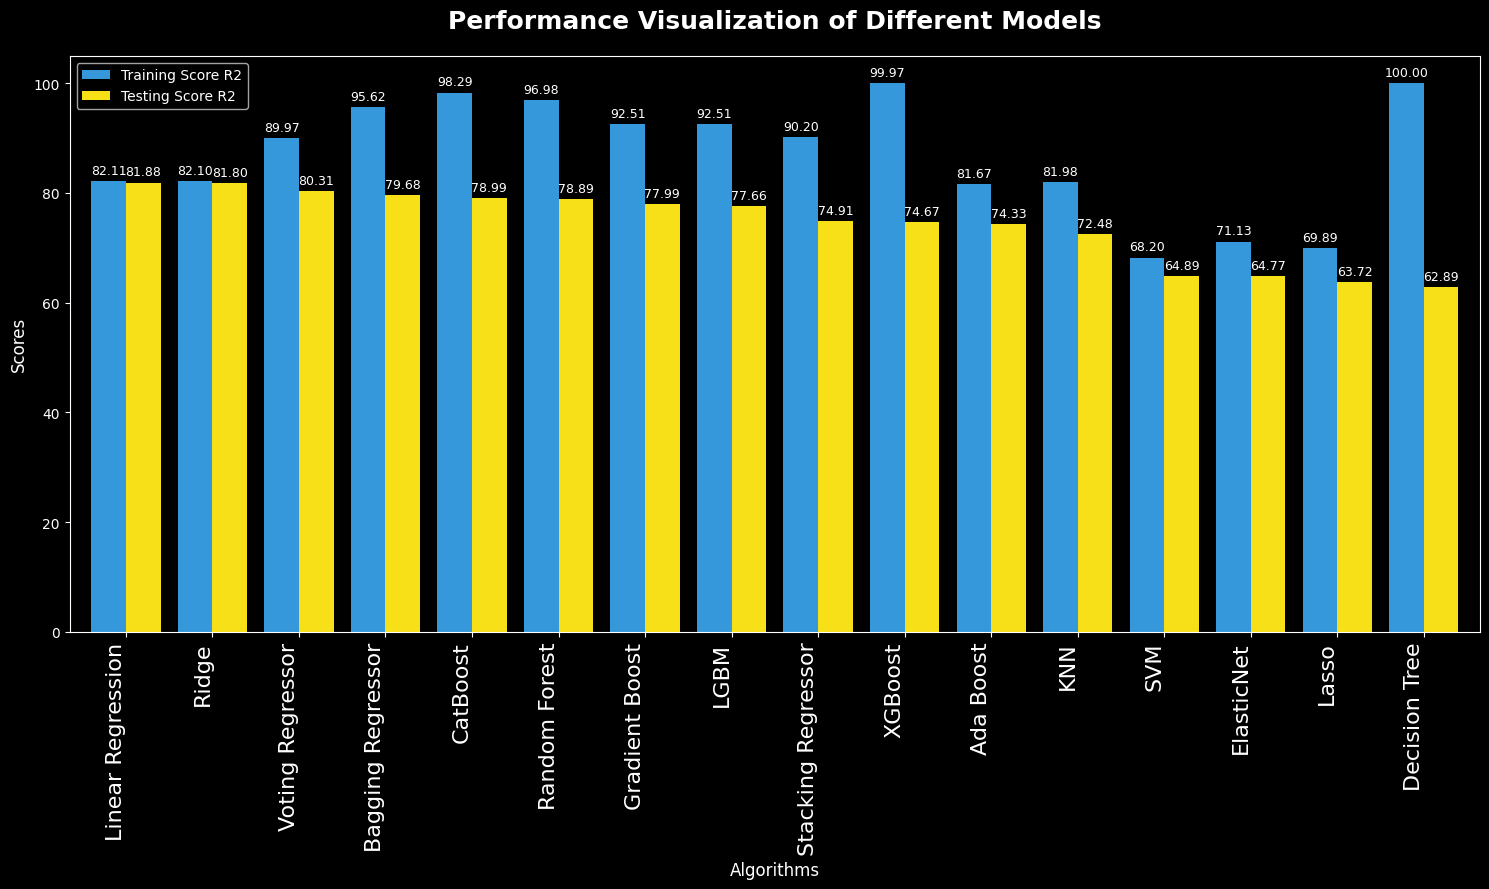

In [72]:
plt.style.use("dark_background")  

colors = ['#3498db', '#f7e017']  

ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(15, 9),
    color=colors,
    width=0.8
)


plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

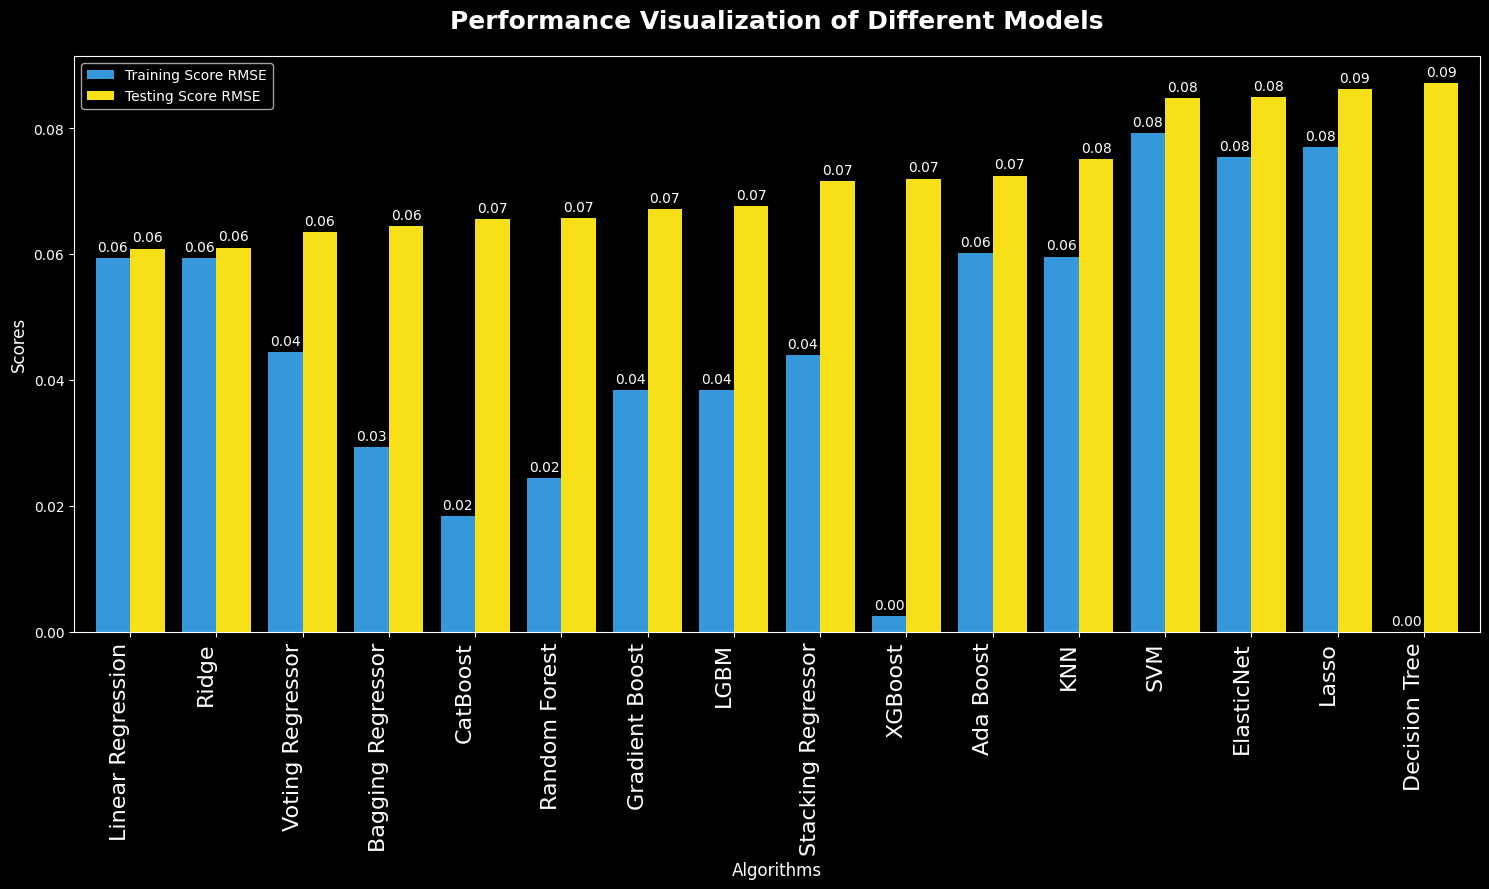

In [73]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")  

colors = ['#3498db', '#f7e017'] 

ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE", "Testing Score RMSE"],
    kind="bar",
    figsize=(15, 9),
    color=colors,
    width=0.8
)

plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

In [74]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [75]:
models = models_dict  
results = evaluate_models(x_train_scaled, x_test_scaled, y_train, y_test)

results

[('Linear Regression', 0.8188432567829628, 0.003704655398788412),
 ('Ridge Regression', 0.8187885396675398, 0.0037057743637988107),
 ('Bagging', 0.7931251833740831, 0.00423059),
 ('Random Forest', 0.7863371540342299, 0.004369405200000001),
 ('Gradient Boosting', 0.7833286428451381, 0.004430929253816925),
 ('K-Nearest Neighbors', 0.7802092909535453, 0.004494719999999999),
 ('Support Vector Regressor', 0.7589384637350618, 0.004929708416617986),
 ('AdaBoost', 0.7480061401860645, 0.005153274433194983),
 ('Decision Tree', 0.574034229828851, 0.008711),
 ('Lasso Regression', -0.00724844132029312, 0.020598230624999995),
 ('ElasticNet', -0.00724844132029312, 0.020598230624999995)]

In [76]:
best_model_name, best_r2, best_rmse = results[0]  

In [77]:
best_model = models_dict[best_model_name]

best_model.fit(x_train_scaled, y_train)
y_pred = best_model.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred) * 100
rmse = mean_squared_error(y_test, y_pred)
print(f"Best Model: {best_model_name}")

Best Model: Linear Regression


In [78]:
import pickle


pickle.dump(best_model, open("adm_2model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [ ]:
#! pip freeze > requirements.txt